<a href="https://colab.research.google.com/github/pavanibasanth/pavani_INFO5731_Fall2024/blob/main/INFO5731_Exercise_5_pavani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 5**

**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## **Question 1 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.


**Algorithms:**

*   MultinominalNB
*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

**Evaluation measurement:**


*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import nltk
import re

print("Setting up required NLTK packages...")
for pkg in ['punkt', 'stopwords', 'averaged_perceptron_tagger']:
    try:
        nltk.download(pkg, quiet=True)
    except Exception as err:
        print(f"Issue encountered while downloading {pkg}: {err}")

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

class SentimentAnalysisWorkflow:
    def __init__(self):
        # Initializing the vectorizer and models
        self.text_vectorizer = TfidfVectorizer(max_features=5000)
        self.model_collection = {
            'NaiveBayes': MultinomialNB(),
            'LinearSVM': LinearSVC(random_state=42),
            'KNearestNeighbors': KNeighborsClassifier(n_neighbors=5),
            'DecisionTree': DecisionTreeClassifier(random_state=42),
            'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
            'XGBoost': XGBClassifier(random_state=42)
        }

    def import_data(self, training_path, testing_path):
        # Loading and parsing dataset files
        def process_file(file_path):
            data_texts, data_labels = [], []
            with open(file_path, 'r', encoding='utf-8') as file:
                for line in file:
                    line = line.strip()
                    if not line:
                        continue
                    split_line = line.split(' ', 1)
                    if len(split_line) == 2:
                        label = int(split_line[0])
                        text = split_line[1].strip()
                        data_texts.append(text)
                        data_labels.append(label)
            return data_texts, data_labels

        train_data, train_labels = process_file(training_path)
        test_data, test_labels = process_file(testing_path)

        print(f"Training data contains {len(train_data)} samples.")
        print(f"Testing data contains {len(test_data)} samples.")

        return train_data, train_labels, test_data, test_labels

    def clean_text(self, raw_text):
        # the preprocessing to remove noise
        raw_text = raw_text.lower()
        raw_text = re.sub(r'[^a-z\s.,!?]', '', raw_text)
        words = raw_text.split()
        stop_words_set = set(stopwords.words('english'))
        filtered_words = [word for word in words if word not in stop_words_set]
        return ' '.join(filtered_words)

    def process_training_data(self, training_texts, training_labels):
        print("Applying text cleaning and preprocessing...")
        cleaned_texts = [self.clean_text(text) for text in training_texts]

        print("Splitting dataset into training and validation sets...")
        X_train, X_valid, y_train, y_valid = train_test_split(
            cleaned_texts, training_labels, test_size=0.2, random_state=42
        )

        print("Transforming text data into vectorized format...")
        X_train_vec = self.text_vectorizer.fit_transform(X_train)
        X_valid_vec = self.text_vectorizer.transform(X_valid)

        return X_train_vec, X_valid_vec, y_train, y_valid

    def fit_and_assess_models(self, X_train, y_train, X_valid, y_valid):
        evaluation_results = {}

        for model_name, model_instance in self.model_collection.items():
            print(f"\nCurrently training the {model_name} model...")

            cv_scores = cross_val_score(model_instance, X_train, y_train, cv=10)
            print(f"Cross-validation accuracy scores: {cv_scores}")
            print(f"Mean CV accuracy for {model_name}: {cv_scores.mean():.4f}")

            model_instance.fit(X_train, y_train)
            predictions = model_instance.predict(X_valid)

            evaluation_results[model_name] = {
                'accuracy': accuracy_score(y_valid, predictions),
                'precision': precision_score(y_valid, predictions),
                'recall': recall_score(y_valid, predictions),
                'f1_score': f1_score(y_valid, predictions)
            }

            print(f"Metrics for {model_name}:")
            for metric, val in evaluation_results[model_name].items():
                print(f"{metric.capitalize()}: {val:.4f}")

        return evaluation_results

def execute_workflow():
    print("Launching sentiment analysis pipeline...")
    workflow = SentimentAnalysisWorkflow()

    print("\nLoading datasets from files...")
    train_texts, train_labels, test_texts, test_labels = workflow.import_data(
        '/content/stsa-train.txt',
        '/content/stsa-test.txt'
    )

    print("\nDisplaying sample entries from the dataset:")
    for idx in range(min(3, len(train_texts))):
        print(f"\nExample {idx+1}:")
        print(f"Sample Text: {train_texts[idx][:100]}...")
        print(f"Associated Label: {train_labels[idx]}")

    print("\nPreprocessing and preparing training data...")
    X_train_vec, X_valid_vec, y_train, y_valid = workflow.process_training_data(train_texts, train_labels)

    print("\nModel training and evaluation commencing...")
    performance_results = workflow.fit_and_assess_models(X_train_vec, y_train, X_valid_vec, y_valid)

    print("\nCompiled Results Summary:")
    performance_df = pd.DataFrame(performance_results).round(4)
    print(performance_df)

if __name__ == "__main__":
    try:
        execute_workflow()
    except Exception as exec_err:
        print(f"An unexpected error occurred: {str(exec_err)}")
        raise

Setting up required NLTK packages...
Launching sentiment analysis pipeline...

Loading datasets from files...
Training data contains 6920 samples.
Testing data contains 1821 samples.

Displaying sample entries from the dataset:

Example 1:
Sample Text: a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror fi...
Associated Label: 1

Example 2:
Sample Text: apparently reassembled from the cutting-room floor of any given daytime soap ....
Associated Label: 0

Example 3:
Sample Text: they presume their audience wo n't sit still for a sociology lesson , however entertainingly present...
Associated Label: 0

Preprocessing and preparing training data...
Applying text cleaning and preprocessing...
Splitting dataset into training and validation sets...
Transforming text data into vectorized format...

Model training and evaluation commencing...

Currently training the NaiveBayes model...
Cross-validation accuracy scores: [0.75631769 0.77978339 0.78519

## **Question 2 (20 Points)**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

**Apply the listed clustering methods to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generating BERT Embeddings: 100%|██████████| 99/99 [00:46<00:00,  2.13it/s]


K-means Silhouette Score: 0.0030444441026799933
BERT K-means Silhouette Score: 0.08613337


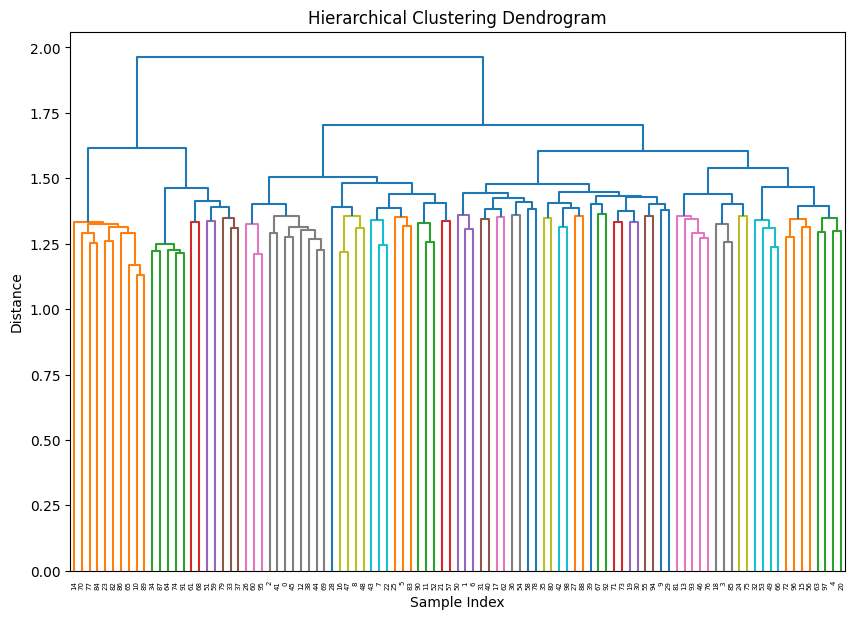

  review_id sentiment  kmeans_labels  dbscan_labels  w2v_labels  \
0  review_0   neutral              2             -1           2   
1  review_1  positive              1             -1           2   
2  review_2   neutral              2             -1           1   
3  review_3  positive              2             -1           0   
4  review_4   neutral              1             -1           2   

   bert_kmeans_labels  
0                   0  
1                   2  
2                   2  
3                   2  
4                   2  


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
import nltk
from nltk.corpus import stopwords
import string
from tqdm import tqdm

# Downloading NLTK stopwords
nltk.download('stopwords')

# Loading the dataset
file_path = '/content/furiosa_reviews_sentiment.csv'
data = pd.read_csv(file_path)

# Preprocessing the Function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Apply the preprocessing
data['cleaned_text'] = data['clean_text'].apply(preprocess_text)
texts = data['cleaned_text'].tolist()

# Vectorization using the TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(texts)

# K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_tfidf.toarray())

# Hierarchical Clustering
Z = linkage(X_tfidf.toarray(), 'ward')

# Word2Vec Clustering
tokenized_reviews = [text.split() for text in texts]
w2v_model = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Creating the average Word2Vec vectors for each document
def get_average_vector(words):
    vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv.key_to_index]
    return np.mean(vectors, axis=0) if vectors else np.zeros(w2v_model.vector_size)

w2v_vectors = np.array([get_average_vector(review) for review in tokenized_reviews])
w2v_labels = KMeans(n_clusters=3, random_state=42).fit_predict(w2v_vectors)

# Optimizing BERT Clustering
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')
bert_embeddings = []
for text in tqdm(texts, desc="Generating BERT Embeddings"):
    bert_embeddings.append(bert_model.encode(text))
bert_embeddings = np.array(bert_embeddings)

bert_kmeans_labels = KMeans(n_clusters=3, random_state=42).fit_predict(bert_embeddings)

# Evaluating
silhouette_kmeans = silhouette_score(X_tfidf, kmeans_labels)
silhouette_bert = silhouette_score(bert_embeddings, bert_kmeans_labels)

print("K-means Silhouette Score:", silhouette_kmeans)
print("BERT K-means Silhouette Score:", silhouette_bert)

# Visualization of the Hierarchical Clustering
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Displaying the clustering results
data['kmeans_labels'] = kmeans_labels
data['dbscan_labels'] = dbscan_labels
data['w2v_labels'] = w2v_labels
data['bert_kmeans_labels'] = bert_kmeans_labels

# Display the relevant columns
columns_to_display = ['review_id', 'sentiment', 'kmeans_labels', 'dbscan_labels', 'w2v_labels', 'bert_kmeans_labels']
print(data[columns_to_display].head())


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

In [ ]:
'''The comparison is revealing that BERT K-means which outperformed standard K-means, and also getting a Silhouette Score of 0.086, which indiactes better cluster separation. In contrast to, K-means showed a low score which is 0.003, while also DBSCAN labeled several points as the noise. Word2Vec clustering which exhibits the variability, also highlighting the advantages of BERT in generating the more cohesive clusters.'''

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.


**(Your submission will not be graded if this question is left unanswered)**



In [3]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

This exercise has deepened my understanding of various different clustering techniques,evaluation metrics and data preprocessing, while but also offering practical experience with many Python libraries. I learned and got to know how to implement and evaluate machine learning algorithms for different text classification, also showcasing the strengths and issues of models like MultinomialNB, BERT, and SVM. More time is needed for this exploration and it would have been beneficial.

'''

'\nPlease write you answer here:\n\nThis exercise has deepened my understanding of various different clustering techniques,evaluation metrics and data preprocessing, while but also offering practical experience with many Python libraries. I learned and got to know how to implement and evaluate machine learning algorithms for different text classification, also showcasing the strengths and issues of models like MultinomialNB, BERT, and SVM. More time is needed for this exploration and it would have been beneficial.\n\n'